In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal as mvn
import math
from numpy.linalg import slogdet, det, solve
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import time

from sklearn.datasets import load_digits
from sklearn.mixture.base import BaseMixture
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.mixture.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.mixture. Anything that cannot be imported from sklearn.mixture is now part of the private API.
  warnings.warn(message, FutureWarning)


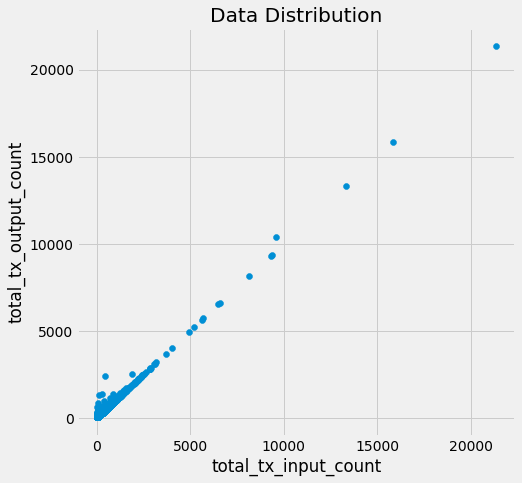

In [ ]:
import pandas as pd
data = pd.read_csv('sheelawithtrue.csv')

plt.figure(figsize=(7,7))
plt.scatter(data["total_tx_input_count"],data["total_tx_output_count"])
plt.xlabel('total_tx_input_count')
plt.ylabel('total_tx_output_count')
plt.title('Data Distribution')
plt.show()

In [ ]:
data.address.value_counts()

1GwADSzn9zyF7HSm44qSwBEVHqmy4gAPLg    1
1J2qqGjPbGMSTu297N8kige2BN47wsn2Hp    1
1FFx5JN2AVjErBiRGrAk2cUKSvYUkQguvs    1
1QLHVd6e965XoLdWPLFQKhYKs3togqeUWc    1
1J2LGqNVcLi7kSTFcb7SBpYGF6k9t8BkQy    1
                                     ..
1JV1mMEsQkoUVA1yKgjeoK1s8hwLzmkw8x    1
1KTyKj6mVUdknKiJQztsWnXY4coLPXAmKQ    1
1FP93fSQRLR7dBBt1hcTyfj6D6eDZpGrWw    1
1KPW9ex2WvrabsTzCHRfzU78uronYpAEGu    1
13JJnvZYaFL1uLoNZ6uZU8D1sD1qxrJmUn    1
Name: address, Length: 10036, dtype: int64

In [ ]:
data.uniqueaddress.value_counts()

2047    1
3379    1
5440    1
9534    1
3387    1
       ..
4767    1
6814    1
669     1
2716    1
2049    1
Name: uniqueaddress, Length: 10036, dtype: int64

In [ ]:
d1=data.drop(['address'], axis = 1) 

In [ ]:
d1.head(5)

,is_miner,uniqueaddress,output_month_min,output_month_max,input_month_min,input_month_max,output_active_time,input_active_time,io_max_lag,io_min_lag,output_active_months,total_tx_output_count,total_tx_output_value,mean_tx_output_value,stddev_tx_output_value,total_output_tx,mean_monthly_output_value,mean_monthly_output_count,input_active_months,total_tx_input_count,total_tx_input_value,mean_tx_input_value,stddev_tx_input_value,total_input_tx,mean_monthly_input_value,mean_monthly_input_count,mean_output_idle_time,mean_input_idle_time
0,True,1,1406851200,1483228800,1406851200,1517443200,76377600,110592000,-34214400,0,26,179,2.772066e+09,1.548640e+07,9.565931e+06,179,1.548640e+07,1,27,179,2.772066e+09,1.548640e+07,9.565931e+06,147,1.548640e+07,1,425531.9719,7.568903e+05
1,True,2,1393632000,1406851200,1393632000,1406851200,13219200,13219200,0,0,6,67,5.887602e+08,8.787466e+06,6.784817e+06,67,8.787466e+06,1,6,67,5.887602e+08,8.787466e+06,6.784817e+06,20,8.787466e+06,1,187154.0303,6.192891e+05
2,True,3,1398902400,1420070400,1406851200,1488326400,21168000,81475200,-68256000,-7948800,8,66,7.839168e+08,1.187753e+07,7.577106e+06,66,1.187753e+07,1,4,66,7.839168e+08,1.187753e+07,7.577106e+06,6,1.187753e+07,1,324495.2462,1.598008e+07
3,True,4,1435708800,1456790400,1435708800,1456790400,21081600,21081600,0,0,9,29,1.376034e+08,4.744946e+06,1.179317e+06,29,4.744946e+06,1,8,29,1.376034e+08,4.744946e+06,1.179317e+06,25,4.744946e+06,1,722611.1429,8.368206e+05
4,True,5,1393632000,1404172800,1393632000,1404172800,10540800,10540800,0,0,5,41,4.317404e+09,1.053025e+08,1.287038e+08,41,1.053025e+08,1,5,41,4.317404e+09,1.053025e+08,1.287038e+08,38,1.053025e+08,1,236121.3250,2.549108e+05


In [ ]:
#training k-means model
from sklearn.cluster import KMeans
new = d1.filter(['uniqueaddress','total_tx_input_count','total_tx_output_count','output_month_min','output_month_max'], axis=1)



new.head(100)


,uniqueaddress,total_tx_input_count,total_tx_output_count,output_month_min,output_month_max
0,1,179,179,1406851200,1483228800
1,2,67,67,1393632000,1406851200
2,3,66,66,1398902400,1420070400
3,4,29,29,1435708800,1456790400
4,5,41,41,1393632000,1404172800
...,...,...,...,...,...
95,96,83,86,1328054400,1351728000
96,97,785,785,1385856000,1467331200
97,98,66,67,1375315200,1498867200
98,99,91,91,1409529600,1443657600


In [ ]:
grouped_multiple = new.groupby(['total_tx_input_count', 'total_tx_output_count']).agg({'output_month_min': ['mean', 'min', 'max']})
grouped_multiple.columns = ['output_month_mean', 'output_month_min', 'output_month_max']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

      total_tx_input_count  ...  output_month_max
0                        2  ...        1385856000
1                        2  ...        1409529600
2                        2  ...        1306886400
3                        2  ...        1396310400
4                        2  ...        1383264000
...                    ...  ...               ...
2745                  9357  ...        1375315200
2746                  9565  ...        1325376000
2747                 13332  ...        1498867200
2748                 15838  ...        1383264000
2749                 21330  ...        1409529600

[2750 rows x 5 columns]


In [ ]:
grouped_multiple = new.groupby(['total_tx_input_count', 'total_tx_output_count']).agg({'output_month_max': ['mean', 'min', 'max']})
grouped_multiple.columns = ['output_month_mean', 'output_month_min', 'output_month_max']
grouped_multiple = grouped_multiple.reset_index()
print(grouped_multiple)

      total_tx_input_count  ...  output_month_max
0                        2  ...        1396310400
1                        2  ...        1420070400
2                        2  ...        1596240000
3                        2  ...        1464739200
4                        2  ...        1438387200
...                    ...  ...               ...
2745                  9357  ...        1425168000
2746                  9565  ...        1483228800
2747                 13332  ...        1585699200
2748                 15838  ...        1427846400
2749                 21330  ...        1601510400

[2750 rows x 5 columns]


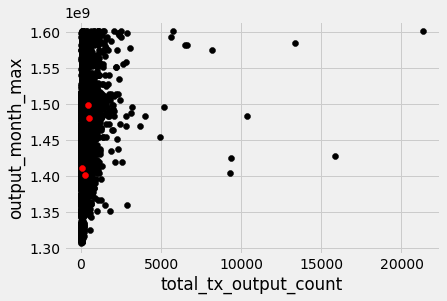

In [ ]:
K=4

# Select random observation as centroids
Centroids = (new.sample(n=K))
plt.scatter(new["total_tx_output_count"],new["output_month_max"],c='black')
plt.scatter(Centroids["total_tx_output_count"],Centroids["output_month_max"],c='red')
plt.xlabel('total_tx_output_count')
plt.ylabel('output_month_max')
plt.show()

X=new
X.head(10)



X.to_csv("newsheelawithtrue.csv")





In [ ]:
from sklearn.cluster import KMeans
Kmeans=KMeans(4)
Kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
clusters=X.copy()
clusters['cluster_pred']=Kmeans.fit_predict(X)

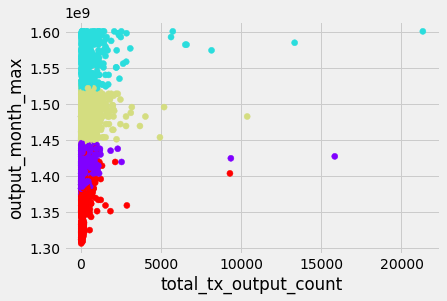

In [ ]:
plt.scatter(clusters['total_tx_output_count'],clusters['output_month_max'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('total_tx_output_count')
plt.ylabel('output_month_max')
plt.show()

In [ ]:
from sklearn import preprocessing
x_scaled=preprocessing.scale(X)

x_scaled


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:173: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


array([[-1.73187823e+00,  1.15321125e-02, -1.20491342e-03,
         8.22066546e-01,  8.31591322e-01],
       [-1.73153306e+00, -2.38795481e-01, -2.49211001e-01,
         3.88752199e-01, -6.61002258e-01],
       [-1.73118790e+00, -2.41030549e-01, -2.51425341e-01,
         5.61511514e-01, -4.02668754e-01],
       ...,
       [ 1.73118790e+00, -2.79026702e-01, -2.89069122e-01,
         3.09452841e-01, -7.13344340e-01],
       [ 1.73153306e+00, -2.41030549e-01, -2.44782321e-01,
        -3.88979084e-02, -8.16340051e-01],
       [ 1.73187823e+00, -9.12810064e-02,  5.43810678e-03,
         1.33861406e-01, -4.47164470e-02]])

In [ ]:
wcss=[]
for i in range(1,30):
  kmeans=KMeans(i)
  kmeans.fit(x_scaled)
  wcss.append(kmeans.inertia_)
wcss

[50180.0,
 39254.59417316026,
 31153.917697259756,
 24572.690709644874,
 20301.42317498287,
 17502.24448546755,
 15685.540289889592,
 13837.888349310535,
 12729.313696148805,
 11934.781181582497,
 11202.482936548848,
 10491.529373486172,
 9738.81069500913,
 9230.402806928641,
 8892.577814679096,
 8530.691901711563,
 8274.666115975962,
 7960.274237008869,
 7736.594637367569,
 7457.405102672936,
 7183.099857569363,
 6968.317951221086,
 6830.42702611961,
 6621.6473252433325,
 6450.900160524622,
 6255.221407267047,
 6069.461156843622,
 5948.791353287088,
 5816.723076570504]

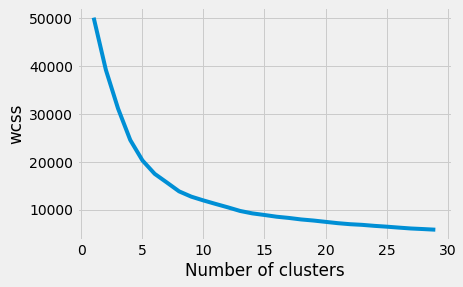

In [ ]:
plt.plot(range(1,30),wcss)
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.show()

In [ ]:
kmeans_new=KMeans(4)
Kmeans.fit(x_scaled)
cluster_new=X.copy()
cluster_new['cluster_pred']=kmeans_new.fit_predict(x_scaled)
cluster_new


,uniqueaddress,total_tx_input_count,total_tx_output_count,output_month_min,output_month_max,cluster_pred
0,1,179,179,1406851200,1483228800,3
1,2,67,67,1393632000,1406851200,3
2,3,66,66,1398902400,1420070400,3
3,4,29,29,1435708800,1456790400,3
4,5,41,41,1393632000,1404172800,3
...,...,...,...,...,...,...
10031,10032,25,98,1388534400,1433116800,1
10032,10033,481,487,1385856000,1483228800,1
10033,10034,49,49,1391212800,1404172800,1
10034,10035,66,69,1380585600,1398902400,1


In [ ]:
cluster_new['cluster'] = kmeans.labels_
cluster_new[cluster_new.cluster == 3]

,uniqueaddress,total_tx_input_count,total_tx_output_count,output_month_min,output_month_max,cluster_pred,cluster
4910,4911,568,568,1343779200,1383264000,0,3
4920,4921,182,185,1304208000,1396310400,0,3
4989,4990,218,218,1322697600,1364774400,0,3
4995,4996,204,204,1314835200,1433116800,0,3
5007,5008,114,114,1309478400,1406851200,0,3
...,...,...,...,...,...,...,...
9904,9905,32,32,1341100800,1391212800,0,3
9910,9911,603,603,1309478400,1364774400,0,3
9976,9977,261,261,1338508800,1420070400,0,3
9999,10000,180,180,1306886400,1383264000,0,3


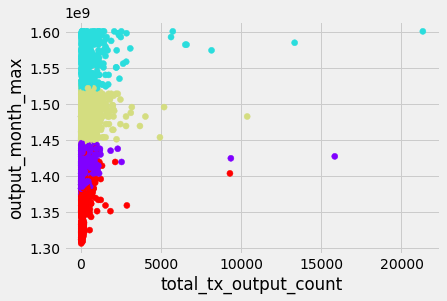

In [ ]:
plt.scatter(clusters['total_tx_output_count'],clusters['output_month_max'],c=clusters['cluster_pred'],cmap='rainbow')
plt.xlabel('total_tx_output_count')
plt.ylabel('output_month_max')
plt.show()

In [ ]:
from sklearn.metrics import silhouette_samples,silhouette_score
df1=X.copy()


df1.head()


,uniqueaddress,total_tx_input_count,total_tx_output_count,output_month_min,output_month_max
0,1,179,179,1406851200,1483228800
1,2,67,67,1393632000,1406851200
2,3,66,66,1398902400,1420070400
3,4,29,29,1435708800,1456790400
4,5,41,41,1393632000,1404172800


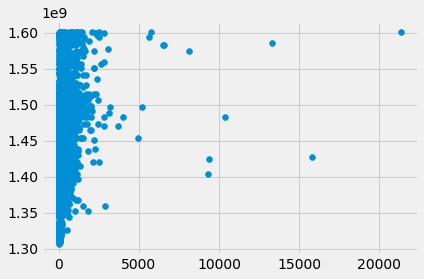

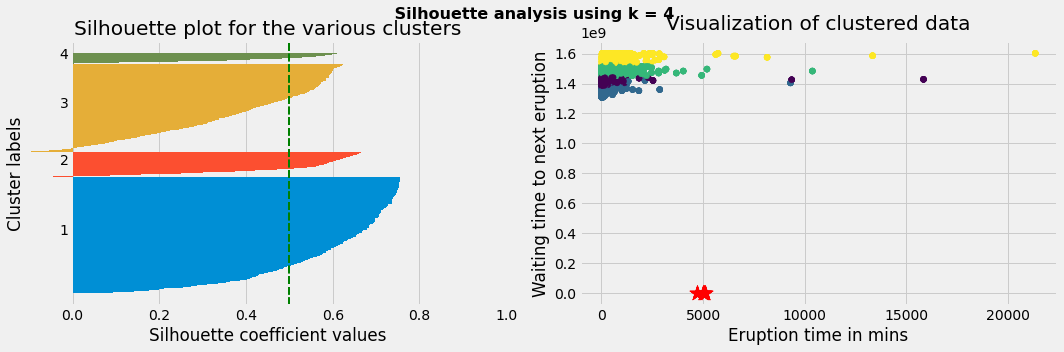

In [ ]:
# plot scatter plot
plt.scatter(df1['total_tx_output_count'],df1['output_month_max'])
# Now check silhouette coefficient
#for i,k1 in enumerate([2,3,4,5]):
    
fig, ax = plt.subplots(1,2,figsize=(15,5))
    
    # Run the kmeans algorithm
km = KMeans(n_clusters=4)
y_predict = km.fit_predict(df1)
centroids  = km.cluster_centers_
# get silhouette
silhouette_vals = silhouette_samples(df1,y_predict)
    #silhouette_vals
# silhouette plot
y_ticks = []
y_lower = y_upper = 0
for i,cluster in enumerate(np.unique(y_predict)):
   cluster_silhouette_vals = silhouette_vals[y_predict ==cluster]
   cluster_silhouette_vals.sort()
   y_upper += len(cluster_silhouette_vals)
   
   ax[0].barh(range(y_lower,y_upper),
   cluster_silhouette_vals,height =1);
   ax[0].text(-0.03,(y_lower+y_upper)/2,str(i+1))
   y_lower += len(cluster_silhouette_vals)
       
   # Get the average silhouette score 
   avg_score = np.mean(silhouette_vals)
   ax[0].axvline(avg_score,linestyle ='--',
   linewidth =2,color = 'green')
   ax[0].set_yticks([])
   ax[0].set_xlim([-0.1, 1])
   ax[0].set_xlabel('Silhouette coefficient values')
   ax[0].set_ylabel('Cluster labels')
   ax[0].set_title('Silhouette plot for the various clusters');
    
    
    # scatter plot of data colored with labels
    
   ax[1].scatter(df1['total_tx_output_count'],
   df1['output_month_max'] , c = y_predict);
   ax[1].scatter(centroids[:,0],centroids[:,1],
   marker = '*' , c= 'r',s =250);
   ax[1].set_xlabel('Eruption time in mins')
   ax[1].set_ylabel('Waiting time to next eruption')
   ax[1].set_title('Visualization of clustered data', y=1.02)
    
   plt.tight_layout()
   plt.suptitle(f' Silhouette analysis using k = 4',fontsize=16,fontweight = 'semibold')
   plt.savefig(f'Silhouette_analysis_{k}.jpg')


In [ ]:
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["total_tx_output_count"]-row_d["total_tx_output_count"])**2
            d2=(row_c["output_month_max"]-row_d["output_month_max"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["total_tx_output_count","output_month_max"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['output_month_max'] - Centroids['output_month_max']).sum() + (Centroids_new['total_tx_output_count'] - Centroids['total_tx_output_count']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["total_tx_output_count","output_month_max"]]


print(Centroids)






-1787044.951587628
3037602.4296078524
-6270475.162568713
225882.0259098007
0.0
         total_tx_output_count  output_month_max
Cluster                                         
1                   108.524345      1.345972e+09
2                   298.788625      1.505936e+09
3                   174.675407      1.446724e+09
4                   107.120633      1.405365e+09


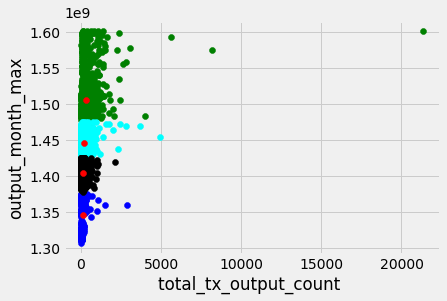

In [ ]:

color=['blue','green','cyan','black']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["total_tx_output_count"],data["output_month_max"],c=color[k])
plt.scatter(Centroids["total_tx_output_count"],Centroids["output_month_max"],c='red')
plt.xlabel('total_tx_output_count ')
plt.ylabel('output_month_max')
plt.show()



In [ ]:


!pip install GMM
import pandas as pd 

# data visualization
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import pandas as pd
data111= pd.read_csv('newsheelawithtrue1.csv')
data111['total_tx_input_count'] = data111['total_tx_input_count'].fillna((data111['total_tx_input_count'].mean()))
# training gaussian mixture model 

data111['total_tx_output_count'] = data111['total_tx_output_count'].fillna((data111['total_tx_output_count'].mean()))


In [ ]:
data111.tail(5)

,uniqueaddress,total_tx_input_count,total_tx_output_count,output_month_min,output_month_max
4064,4065,254.000000,257.000000,1362096000,1451606400
4065,4066,110.000000,110.000000,1385856000,1404172800
4066,4067,108.000000,108.000000,1383264000,1451606400
4067,4068,202.000000,202.000000,1364774400,1417392000
4068,4069,175.162488,181.082104,1393632000,1509494400


In [ ]:

from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=4)
gmm.fit(data111)

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=100,
                means_init=None, n_components=4, n_init=1, precisions_init=None,
                random_state=None, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

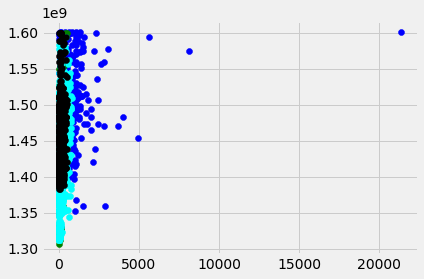

In [ ]:
#predictions from gmm
labels = gmm.predict(data111)
frame = pd.DataFrame(data)
frame['cluster'] = labels
frame.columns = ['uniqueaddress','total_tx_input_count','total_tx_output_count','output_month_min','output_month_max','cluster']

color=['blue','green','cyan', 'black']
for k in range(0,4):
    data = frame[frame["cluster"]==k]
    plt.scatter(data["total_tx_output_count"],data["output_month_max"],c=color[k])
plt.show()

In [ ]:
import seaborn as sns

from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

import pandas as pd
data222= pd.read_csv('newsheelawithtrue1.csv')
data222['total_tx_input_count'] = data222['total_tx_input_count'].fillna((data222['total_tx_input_count'].mean()))
# training gaussian mixture model 

data222['total_tx_output_count'] = data222['total_tx_output_count'].fillna((data222['total_tx_output_count'].mean()))
data222.tail(5)

,uniqueaddress,total_tx_input_count,total_tx_output_count,output_month_min,output_month_max
4064,4065,254.000000,257.000000,1362096000,1451606400
4065,4066,110.000000,110.000000,1385856000,1404172800
4066,4067,108.000000,108.000000,1383264000,1451606400
4067,4068,202.000000,202.000000,1364774400,1417392000
4068,4069,175.162488,181.082104,1393632000,1509494400


In [ ]:
# Preprocessing the data to make it visualizable 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 

X1=data222
# Scaling the Data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X1) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head() 

,P1,P2
0,0.814488,0.553111
1,0.906638,-0.215076
2,0.914921,-0.061207
3,0.666301,0.390108
4,0.892038,-0.241196


In [ ]:
# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 4, affinity ='rbf') 

# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_principal) 


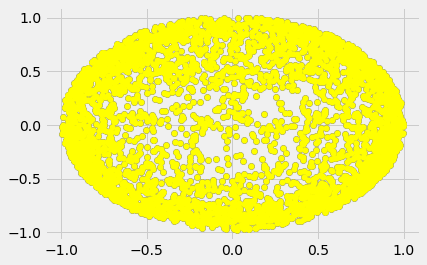

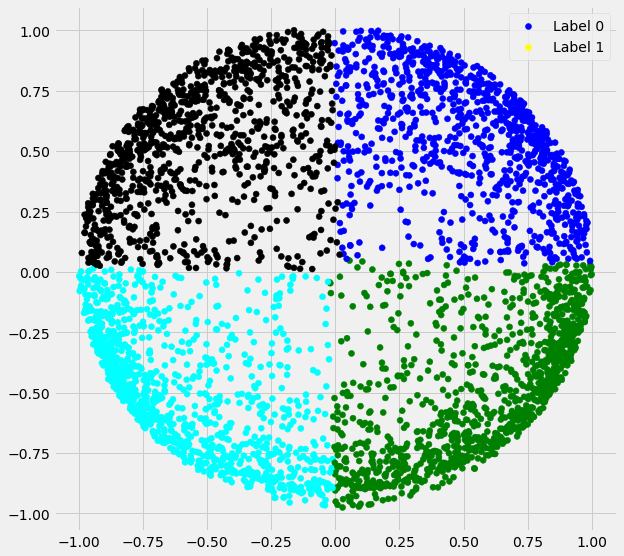

In [ ]:
#https://www.geeksforgeeks.org/ml-spectral-clustering/
# Building the label to colour mapping 
colours = {} 
colours[0] = 'blue'
colours[1] = 'green'
colours[2]='cyan'
colours[3]='black'

# Building the colour vector for each data point 
cvec = [colours[label] for label in labels_rbf] 

# Plotting the clustered scatter plot 

b = plt.scatter(X_principal['P1'], X_principal['P2'], color ='blue'); 
y = plt.scatter(X_principal['P1'], X_principal['P2'], color ='yellow'); 

plt.figure(figsize =(9, 9)) 
plt.scatter(X_principal['P1'], X_principal['P2'], c = cvec) 
plt.legend((b, y), ('Label 0', 'Label 1')) 
plt.show() 


In [ ]:
#https://www.geeksforgeeks.org/ml-spectral-clustering/

In [ ]:
#spectral clustering



